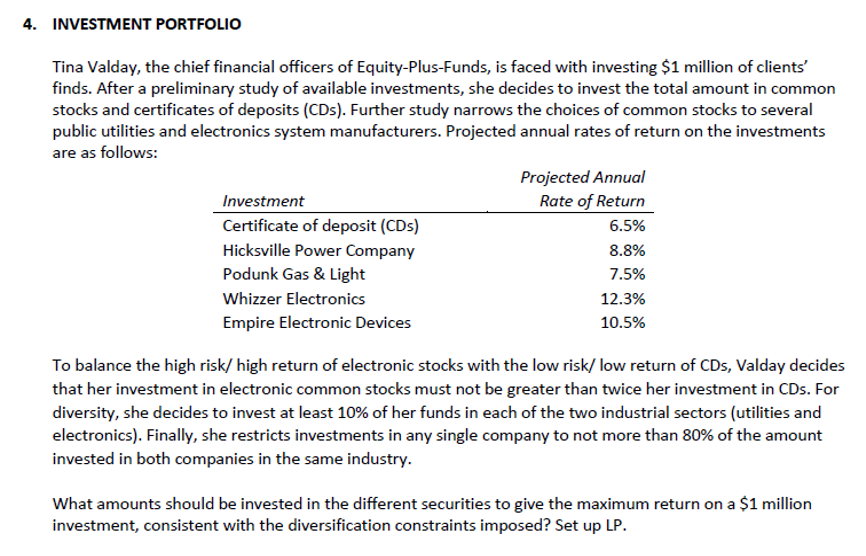

In [2]:
from pulp import *
import pandas as pd

In [3]:
infodf = pd.DataFrame({'Investment': ['CDs', 'Hicksville', 'Podunk', 'Whizzer', 'Empire'],
                   'Projected Annual Rate of Return': [.065, .088, .075, .123, .105],
                   'Investment Type': ['Bonds', 'Utilities', 'Utilities', 'Electronics', 'Electronics']
                    })

print(infodf)

   Investment  Projected Annual Rate of Return Investment Type
0         CDs                            0.065           Bonds
1  Hicksville                            0.088       Utilities
2      Podunk                            0.075       Utilities
3     Whizzer                            0.123     Electronics
4      Empire                            0.105     Electronics


In [4]:
# Initialize the LP
model = LpProblem('Investment Portfolio', LpMaximize)

# Decision Variables
x = LpVariable.dicts('x', [1, 2, 3, 4, 5], lowBound=0, cat='Integer') # CDs, Hicksville, Podunk, Whizzer, Empire

# Objective Function
model += 0.065 * x[1] + 0.088 * x[2] + 0.075 * x[3] + 0.123 * x[4] + 0.105 * x[5] # Max Return

# Add Constraints
investment = 1000000
model += x[1] + x[2] + x[3] + x[4] + x[5] <= investment, 'Total Investment'
model += x[4] + x[5] <= 2 * x[1], 'Electronics Commons Stocks'
model += x[2] + x[3] >= .1 * investment, 'Min Investment in Utilities'
model += x[4] + x[5] >= .1 * investment, 'Min Investment in Electronics'
model += x[2] <= .8 * (x[2] + x[3]), '80% Max Investment in Hicksville'
model += x[3] <= .8 * (x[2] + x[3]), '80% Max Investment in Podunk'
model += x[4] <= .8 * (x[4] + x[5]), '80% Max Investment in Whizzer'
model += x[5] <= .8 * (x[4] + x[5]), '80% Max Investment in Empire'

print(model)

# Solve the problem
status = model.solve()
print(LpStatus[status])

# Display variables
for var in model.variables():
    print(f"{var.name} = {var.varValue}")

# Display objective
max_return = value(model.objective)
print(f"max return = {max_return}")

Investment_Portfolio:
MAXIMIZE
0.065*x_1 + 0.088*x_2 + 0.075*x_3 + 0.123*x_4 + 0.105*x_5 + 0.0
SUBJECT TO
Total_Investment: x_1 + x_2 + x_3 + x_4 + x_5 <= 1000000

Electronics_Commons_Stocks: - 2 x_1 + x_4 + x_5 <= 0

Min_Investment_in_Utilities: x_2 + x_3 >= 100000

Min_Investment_in_Electronics: x_4 + x_5 >= 100000

80%_Max_Investment_in_Hicksville: 0.2 x_2 - 0.8 x_3 <= 0

80%_Max_Investment_in_Podunk: - 0.8 x_2 + 0.2 x_3 <= 0

80%_Max_Investment_in_Whizzer: 0.2 x_4 - 0.8 x_5 <= 0

80%_Max_Investment_in_Empire: - 0.8 x_4 + 0.2 x_5 <= 0

VARIABLES
0 <= x_1 Integer
0 <= x_2 Integer
0 <= x_3 Integer
0 <= x_4 Integer
0 <= x_5 Integer

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jason/Documents/GitHub/naut/quantitative_methods/env/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/c5a809c0c61b44a7b9bb02d7fbee0137-pulp.mps -max -timeMode elapsed -branch -printingOptions all -soluti

/Users/jason/Documents/GitHub/naut/quantitative_methods/env/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
